In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

# Projeto 2 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Arthur Henrique Silva Carvalho
## Matrícula: 211026673

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [2]:
#Código das funções utilizadas.

# Questão 1

Um sistema de aquisição de dados de eletrocardiograma foi ligado de forma equivocada perto demais da rede elétrica. Assim, a interferência da rede elétrica (a 60 Hz) aparece de forma marcante no sinal adquirido. O seu objetivo é projetar um filtro digital para eliminar totalmente o ruído em 60Hz. A frequência de amostragem do sistema é: 

$$ f_a = 500~Hz $$ 

Siga as questões abaixo.

## Questão 1a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

Sabendo que $f_a = 500 \ Hz$, e que o ruído se situa a $60 \ Hz$, temos:

$500 \rightarrow 2\pi$

$60 \ \ \rightarrow \Omega$

Logo, a função de transferência de nosso filtro notch terá zeros em $e^{0.24j\pi}$ e em $e^{-0.24j\pi}$ e polos em $r e^{0.24j\pi}$ e em $r e^{-0.24j\pi}$, adotaremos $r = 0.9$, com o seguinte diagrama de pólos:

<img src="diag.png" alt="drawing" width="400"/>

Onde $X$ representa um zero e $O$ representa um pólo.





## Questão 1b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

A função de transferência, portanto, é dada por:

$H(e^{j\omega}) = \frac{(e^{j\omega} - e^{0.24j\pi})(e^{j\omega} - e^{-0.24j\pi})}{(e^{j\omega} - 0.9e^{0.24j\pi})(e^{j\omega} - 0.9e^{-0.24j\pi})}$

Realizando as multiplicações da função de transferência, podemos alcançar a seguinte equação de diferenças:

$y[n] - 0.9(e^{0.24j\pi} + e^{-0.24j\pi})y[n-1] - 0.9^{2}y[n-2] = x[n] - (e^{0.24j\pi} + e^{-0.24j\pi})x[n-1] + x[n-2]$

$y[n] - 0.9\cos(0.24\pi)y[n-1] - 0.9^{2}y[n-2] = x[n] - \cos(0.24\pi)x[n-1] + x[n-2]$

## Questão 1c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

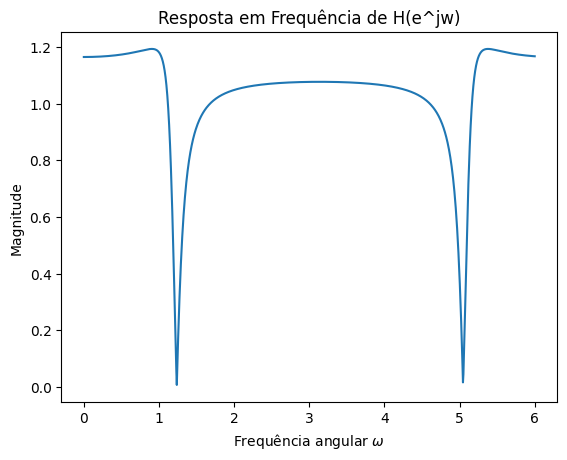

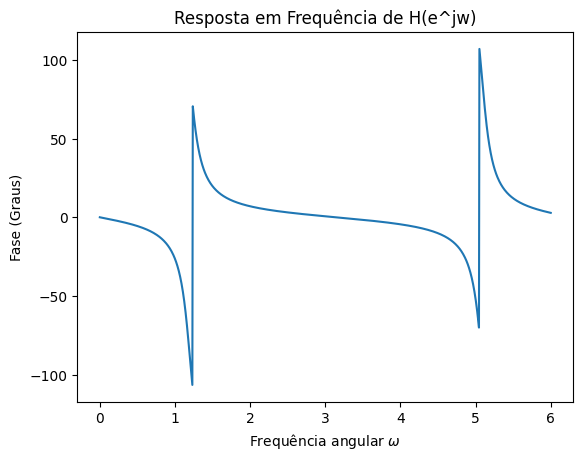

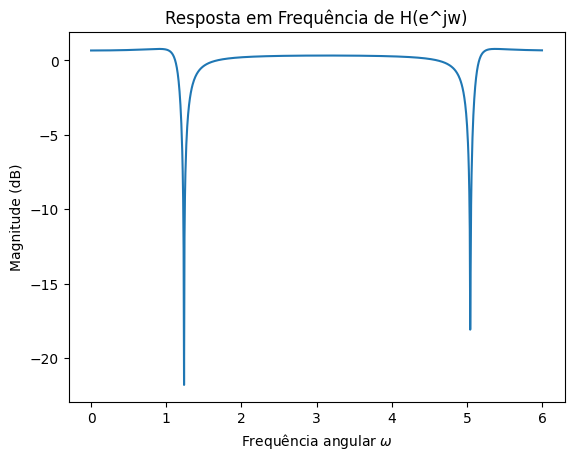

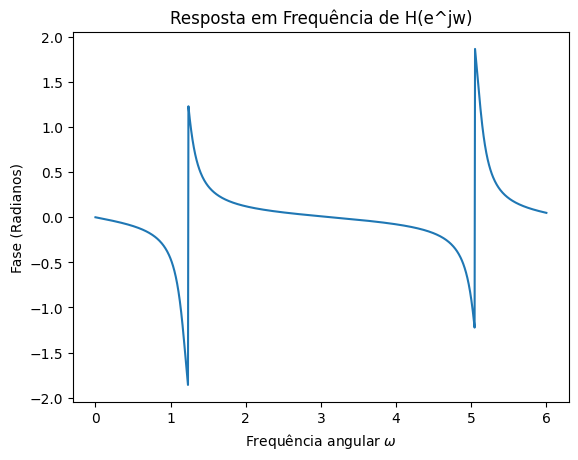

In [8]:
w = np.linspace(0, 6, 1000)
w_ax = np.exp(1j * w)

H = (w_ax * w_ax - np.cos(0.24*np.pi) * w_ax * 0.9 + 1) / (w_ax * w_ax - np.cos(0.24*np.pi) * w_ax * 0.9 + 0.9**2)
H_abs = abs(H)
H_phase_deg = np.angle(H, deg=True)

plt.plot(w, H_abs)
plt.title('Resposta em Frequência de H(e^jw)')
plt.xlabel('Frequência angular $\omega$')
plt.ylabel('Magnitude')
plt.show()

plt.plot(w, H_phase_deg)
plt.title('Resposta em Frequência de H(e^jw)')
plt.xlabel('Frequência angular $\omega$')
plt.ylabel('Fase (Graus)')
plt.show()

H_mag_db = 10 * np.log10(abs(H))
H_phase = np.angle(H)

plt.plot(w, H_mag_db)
plt.title('Resposta em Frequência de H(e^jw)')
plt.xlabel('Frequência angular $\omega$')
plt.ylabel('Magnitude (dB)')
plt.show()

plt.plot(w, H_phase)
plt.title('Resposta em Frequência de H(e^jw)')
plt.xlabel('Frequência angular $\omega$')
plt.ylabel('Fase (Radianos)')
plt.show()

## Questão 1d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

In [6]:
#Resposta da questão 1d

sinal = sp.io.loadmat('noisy_ecg_data.mat')['noisy_ecg'].ravel()

# Questão 2

Ainda no sistema de aquisição de dados de eletrocardiograma, mais tarde foi verificado que, mesmo depois de resolvido o problema da interferência da rede elétrica (i.e., o sinal não tem um ruído específico em 60Hz), o sinal adquirido tinha bastante ruído de alta frequência (acima de 35Hz). O objetivo desta questão é projetar um filtro digital para atenuar as frequências acima de 35Hz. A frequêencia de amostragem do sistema é:

$$ f_a = 500~Hz $$

Siga as questões abaixo.

## Questão 2a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

In [7]:
#Resposta da questão 2a

## Questão 2b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

In [8]:
#Resposta da questão 2b

## Questão 2c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

In [9]:
#Resposta da questão 2c

## Questão 2d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data_2.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

In [10]:
#Resposta da questão 2d

sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

# Questão 3

Considere o filtro analógico:

$$ H_a \left(s\right) = \frac{\omega_c}{\omega_c + s}$$

E considere o valor:

$$\omega_c = 10^3 $$

## Questão 3a (1  ponto)

Projete uma aproximação digital para este filtro com critério de 10%. Indique a taxa de amostragem calculada para esta aproximação (T1) e compare a resposta em frequência do filtro projetado H1() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

In [11]:
#Resposta da questão 3a

## Questão 3b (1  ponto)

Projete uma aproximação digital para este filtro com critério de 1%. Indique a taxa de amostragem calculada para esta aproximação (T2) e compare a resposta em frequência do filtro projetado H2() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

In [12]:
#Resposta da questão 3b

## Questão 3c (1 ponto)

Calcule a resposta ao impulso ha(t) do filtro analógico Ha(s), bem como as respostas ao impulso h1[n] e h2[n] dos filtros projetados H1(z) e H2(z). **Plote** as respostas ao impulso na mesma escala.

In [13]:
#Resposta da questão 3c

## Questão 3d (2 pontos)

Considere o sinal:
$$ x\left(t\right) = e^{- \lambda t} u\left(t\right)$$

com

$$\lambda = 500 $$

Calcule a resposta teórica do filtro analógico, y(t), bem como a resposta do filtro digital H1(z) ao sinal amostrado com taxa T1 (x1[n]) e a resposta do filtro digital H2(z) ao sinal amostrado com taxa T2 (x2[n]). **Plote**, na mesma escala, o sinal y(t) e as aproximações y1[n] e y2[n]. 

In [14]:
#Resposta da questão 3d